In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import ta
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# loading dataset
#data = pd.read_csv('/Users/saimasultana/AAPL.csv')
data = pd.read_csv(data_path)

In [3]:
# calculate daily returns
data['Daily_Return'] = data['Close'].pct_change()

In [4]:
# calculate volatility (standard deviation of daily returns)
window_size = 20  # You can adjust the window size as needed
data['Volatility'] = data['Daily_Return'].rolling(window=window_size).std()

In [5]:
# calculate moving averages
data['SMA_20'] = ta.trend.sma_indicator(data['Close'], window=20)  # 20-day Simple Moving Average
data['SMA_50'] = ta.trend.sma_indicator(data['Close'], window=50)  # 50-day Simple Moving Average

In [6]:
# drop rows with NaN values
data.dropna(inplace=True)

In [7]:
# selecting features
features = ['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50', 'Volatility'] 
X = data[features]
y = data['Close']  # predicting the closing price

In [8]:
# splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# creating linear model
model = LinearRegression()


In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# making predictions
y_pred = model.predict(X_test)

In [12]:
# evaluating model
mse = mean_squared_error(y_test, y_pred)
LR_rmse = np.sqrt(mse)
LR_r2 = r2_score(y_test, y_pred)

print('Root Mean Squared Error:', LR_rmse)
print('R-Squared Score:', LR_r2)

Root Mean Squared Error: 0.12466690881992475
R-Squared Score: 0.998630635852625


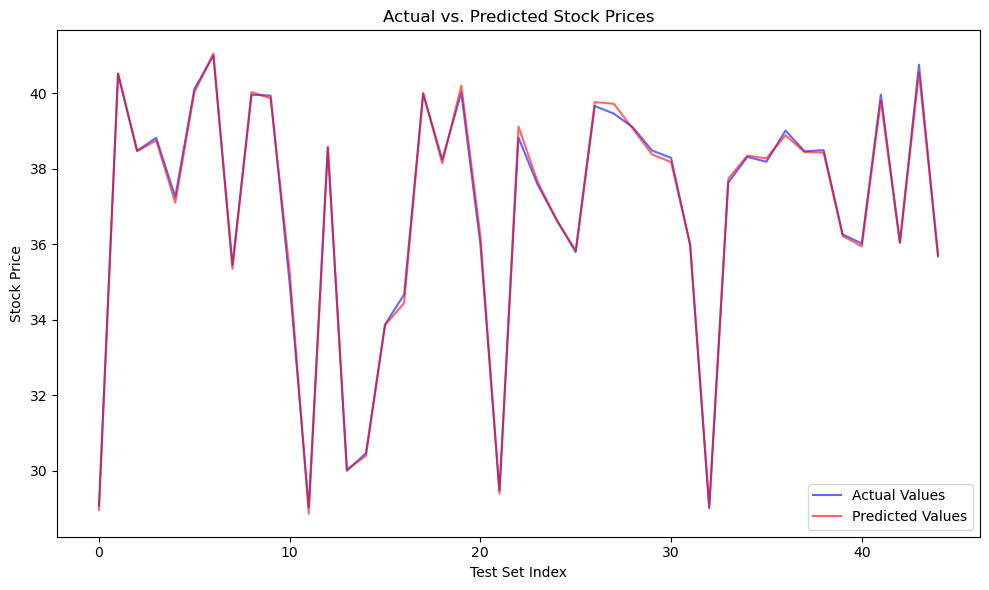

In [13]:
# plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Values', color='red', alpha=0.6)
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Test Set Index')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()